# Prediction of Income using "Census Income" dataset

Build a classification model based on the features that you select to predict if the income is above $50k or not.

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [112]:
'''
The data here is for the "Census Income" dataset, 
which contains data on adults from the 1994 census. 
This data is labeled with whether the person's yearly income is above 
or below $50K (and you are trying to model and predict this).
'''
df=pd.read_csv("census - census.csv") #Loading the dataset
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


# Performing Data Cleaning on the dataset

In [113]:
m=df.replace("?",np.nan) #replacing the miscoded information
m

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [114]:
m.mode() #finding mode to calculate the most occuring item in each column

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,36.0,Private,123011,HS-grad,9.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K
1,NaN,NaN,164190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,203488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [115]:
m.isnull().sum() #dataset for null values

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [116]:
#handling missing data with their modes
m["workclass"]=m["workclass"].fillna("Private")
m["occupation"]=m["occupation"].fillna("Prof-specialty")
m["native.country"]=m["native.country"].fillna("United-States")
m 

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [117]:
m.isnull().sum() #null values removed
                 #Dataset Cleaned

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [118]:
m.columns #columns names in dataset

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [119]:
m.dtypes #data type of each column

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

# Visualization

Separating the Categorical and Numerical data

In [120]:
categorical = m.select_dtypes(include = ["object"]).keys()
print(categorical)

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country', 'income'],
      dtype='object')


In [121]:
quantitative = m.select_dtypes(include = ["int64"]).keys()
print(quantitative)

Index(['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week'],
      dtype='object')


In [122]:
m[quantitative].describe()#performing statistics

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


# Plots of Categorical Data

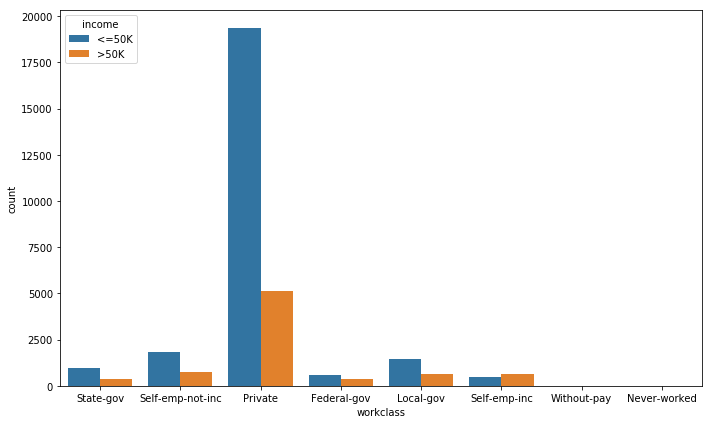

In [123]:
fig = plt.figure(figsize=(10,6))

sns.countplot('workclass', hue='income', data=m)
plt.tight_layout()
plt.show()

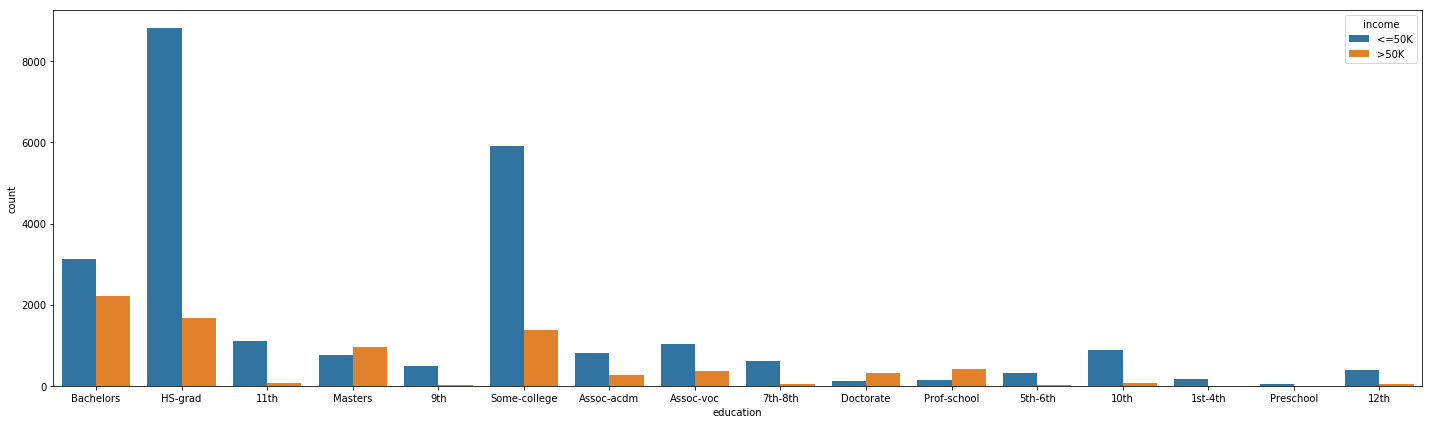

In [124]:
fig = plt.figure(figsize=(20,6))

sns.countplot('education', hue='income', data=m)
plt.tight_layout()
plt.show()

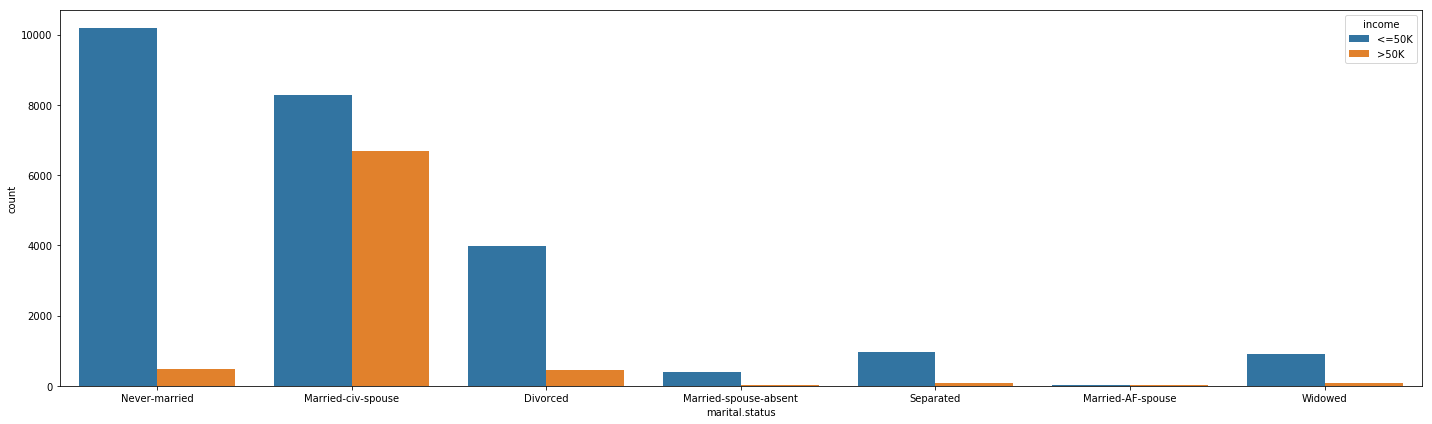

In [125]:
fig = plt.figure(figsize=(20,6))

sns.countplot('marital.status', hue='income', data=m)
plt.tight_layout()
plt.show()

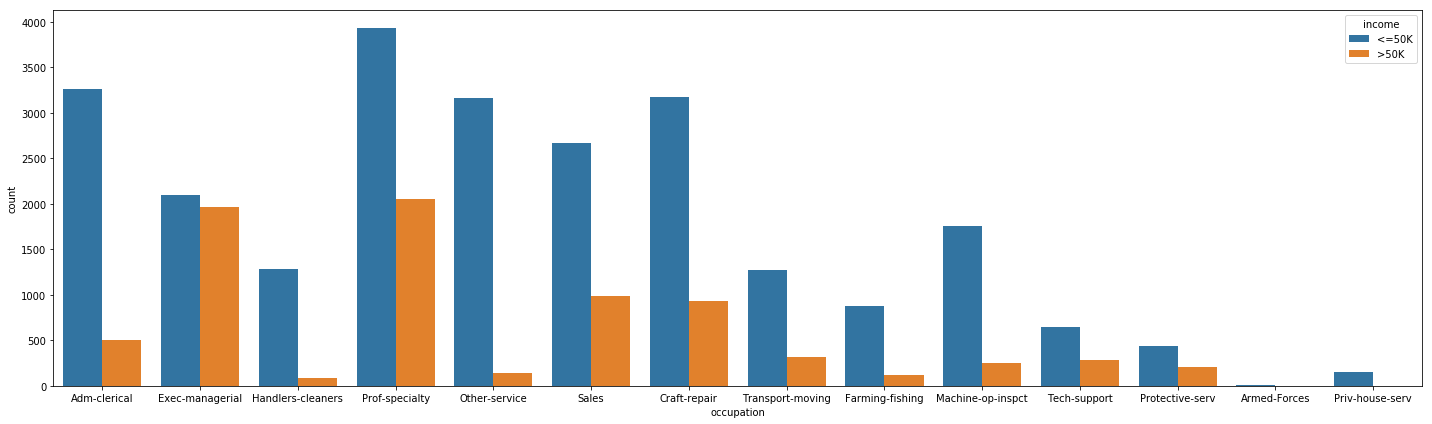

In [126]:
fig = plt.figure(figsize=(20,6))

sns.countplot('occupation', hue='income', data=m)
plt.tight_layout()
plt.show()

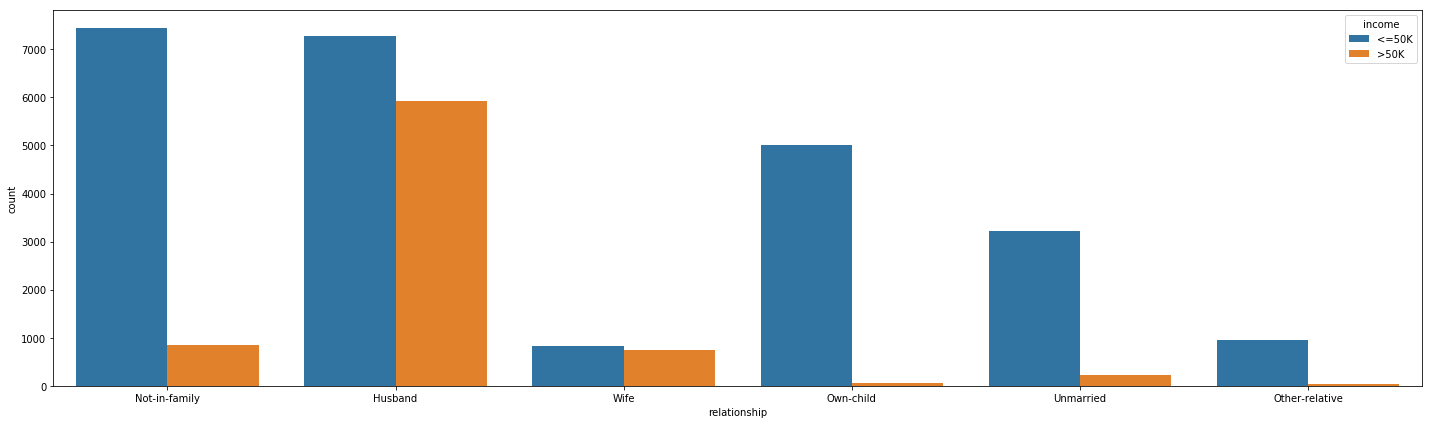

In [127]:
fig = plt.figure(figsize=(20,6))

sns.countplot('relationship', hue='income', data=m)
plt.tight_layout()
plt.show()

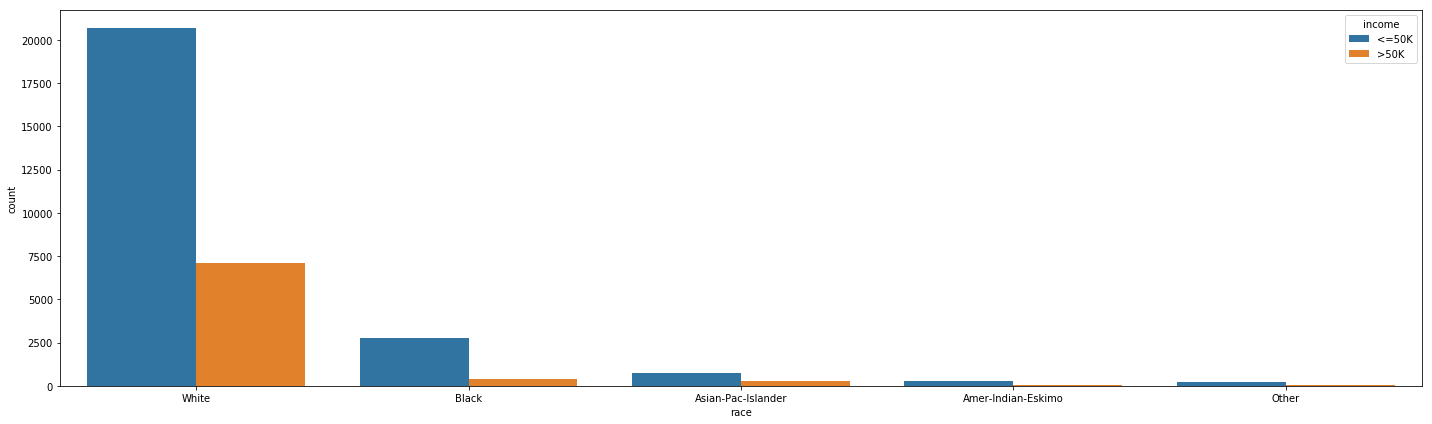

In [128]:
fig = plt.figure(figsize=(20,6))

sns.countplot('race', hue='income', data=m)
plt.tight_layout()
plt.show()

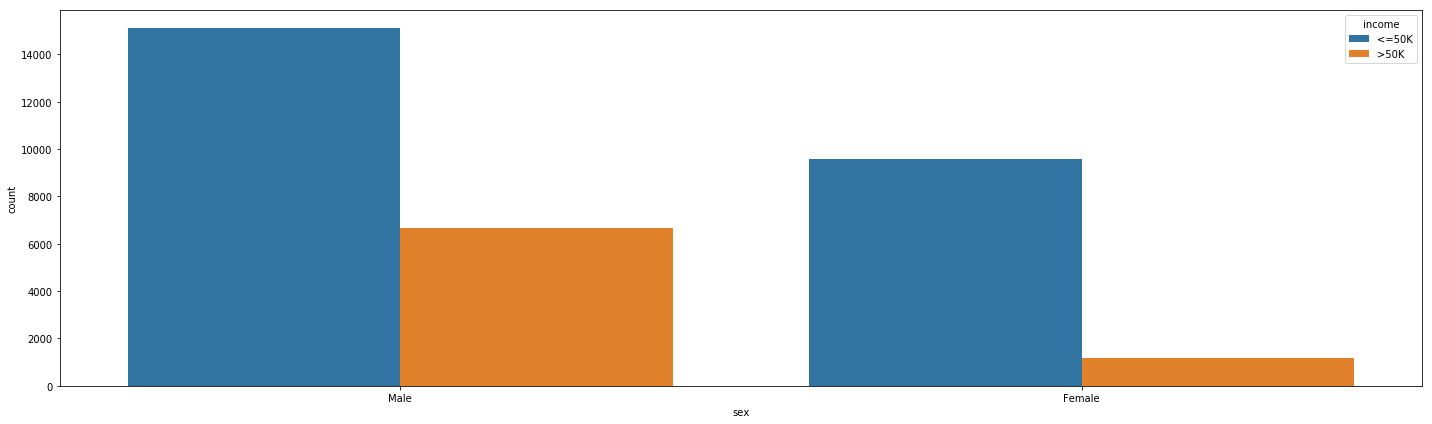

In [129]:
fig = plt.figure(figsize=(20,6))

sns.countplot('sex', hue='income', data=m)
plt.tight_layout()
plt.show()

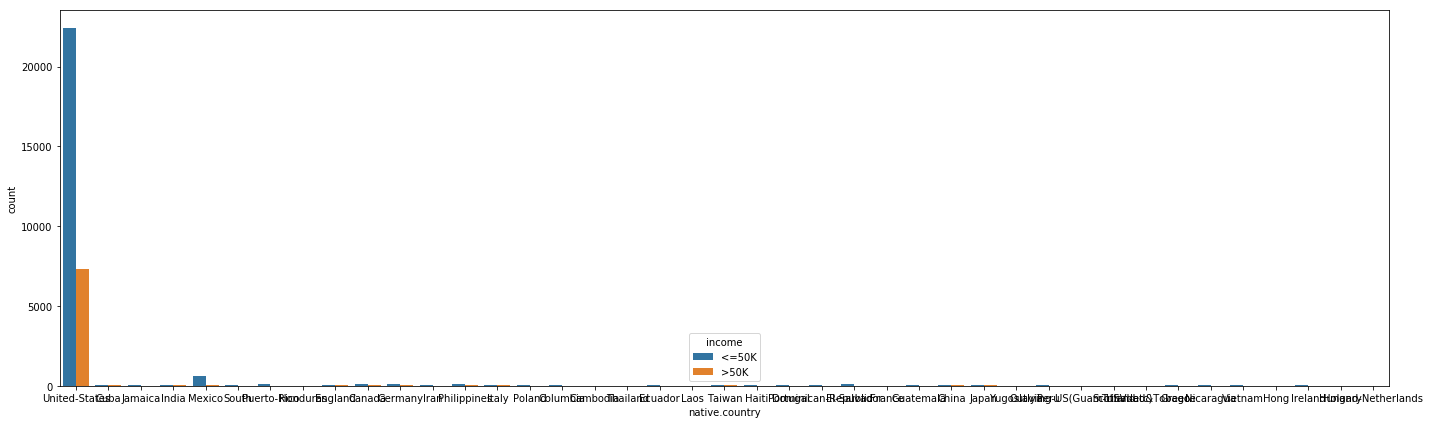

In [130]:
fig = plt.figure(figsize=(20,6))

sns.countplot('native.country', hue='income', data=m)
plt.tight_layout()
plt.show()

In [131]:
# converting sex and income to "0" and "1" 
def income_to_numeric(x):
    if x=='>50K':
        return 1
    if x=='<=50K':
        return 0
    
m['income'] = m['income'].apply(income_to_numeric)
def sex_to_numeric(x):
    if x=='Male':
        return 1
    if x=='Female':
        return 0
    
m['sex'] = m['sex'].apply(sex_to_numeric)

# EDA

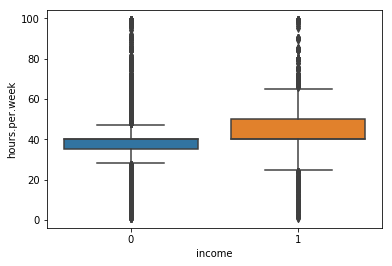

In [133]:
sns.boxplot(y='hours.per.week',x='income',data=m)

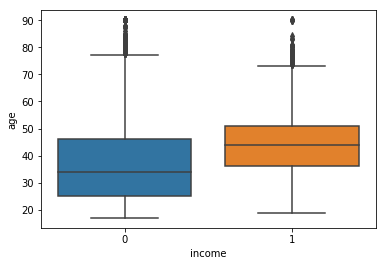

In [134]:
sns.boxplot(y='age',x='income',data=m)

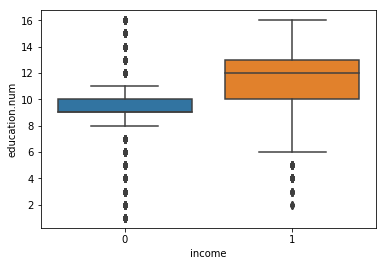

In [136]:
sns.boxplot(y='education.num',x='income',data=m)

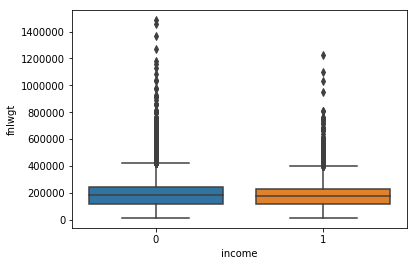

In [137]:
sns.boxplot(y='fnlwgt',x='income',data=m)

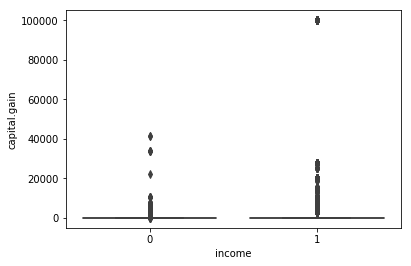

In [138]:
sns.boxplot(y='capital.gain',x='income',data=m)

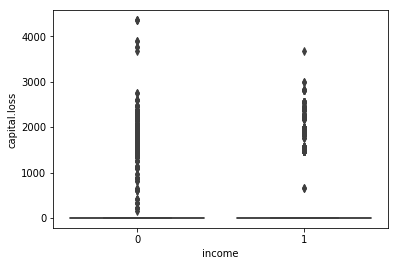

In [139]:
sns.boxplot(y='capital.loss',x='income',data=m)

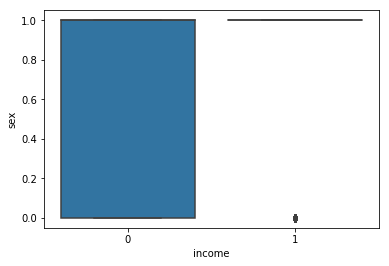

In [140]:
sns.boxplot(y=m['sex'],x='income',data=m)

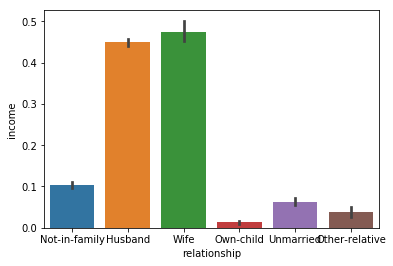

In [141]:
sns.barplot(y='income',x='relationship',data=m)

Text(0.5,0,'native.country')

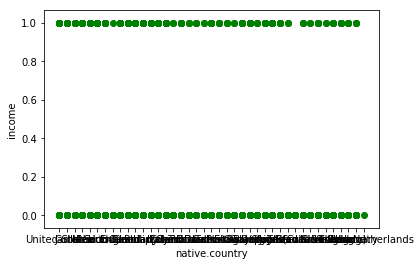

In [142]:
plt.scatter(m["native.country"],m["income"],c="g") 
plt.ylabel("income")
plt.xlabel("native.country")

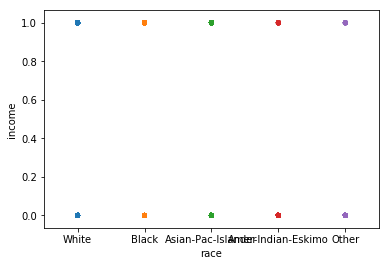

In [143]:
sns.stripplot(y="income",x="race",data=m)

In [144]:
dums=pd.get_dummies(m, columns=["workclass", "education", "marital.status", "occupation"])
dums

,age,fnlwgt,education.num,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,...,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
0,39,77516,13,Not-in-family,White,1,2174,0,40,United-States,...,0,0,0,0,0,0,0,0,0,0
1,50,83311,13,Husband,White,1,0,0,13,United-States,...,0,0,0,0,0,0,0,0,0,0
2,38,215646,9,Not-in-family,White,1,0,0,40,United-States,...,0,1,0,0,0,0,0,0,0,0
3,53,234721,7,Husband,Black,1,0,0,40,United-States,...,0,1,0,0,0,0,0,0,0,0
4,28,338409,13,Wife,Black,0,0,0,40,Cuba,...,0,0,0,0,0,1,0,0,0,0
5,37,284582,14,Wife,White,0,0,0,40,United-States,...,0,0,0,0,0,0,0,0,0,0
6,49,160187,5,Not-in-family,Black,0,0,0,16,Jamaica,...,0,0,0,1,0,0,0,0,0,0
7,52,209642,9,Husband,White,1,0,0,45,United-States,...,0,0,0,0,0,0,0,0,0,0
8,31,45781,14,Not-in-family,White,0,14084,0,50,United-States,...,0,0,0,0,0,1,0,0,0,0
9,42,159449,13,Husband,White,1,5178,0,40,United-States,...,0,0,0,0,0,0,0,0,0,0


In [145]:
dums=dums.drop(columns=["relationship","race","native.country"])

After performing EDA we came to a conclusion that there are three columns which are not useful for the prediction and removal of these columns will not affect the prediction

We also converted required Categorical values into Numerical values so that it will be easy to correlate between them.

# Correlations between Features

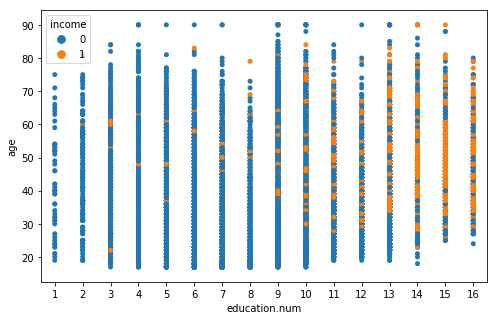

In [146]:
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5
sns.stripplot(dums['education.num'],dums['age'],hue=dums['income'],data=dums)

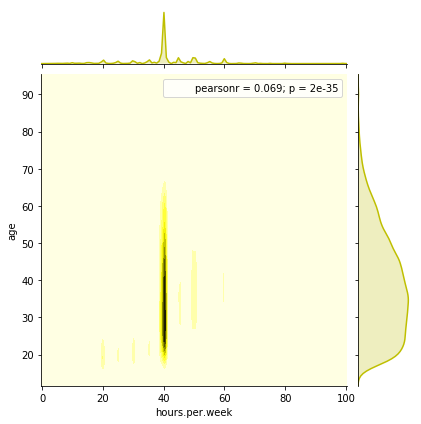

In [148]:
sns.jointplot(dums['hours.per.week'],dums['age'],kind='kde',color='y',data=dums)

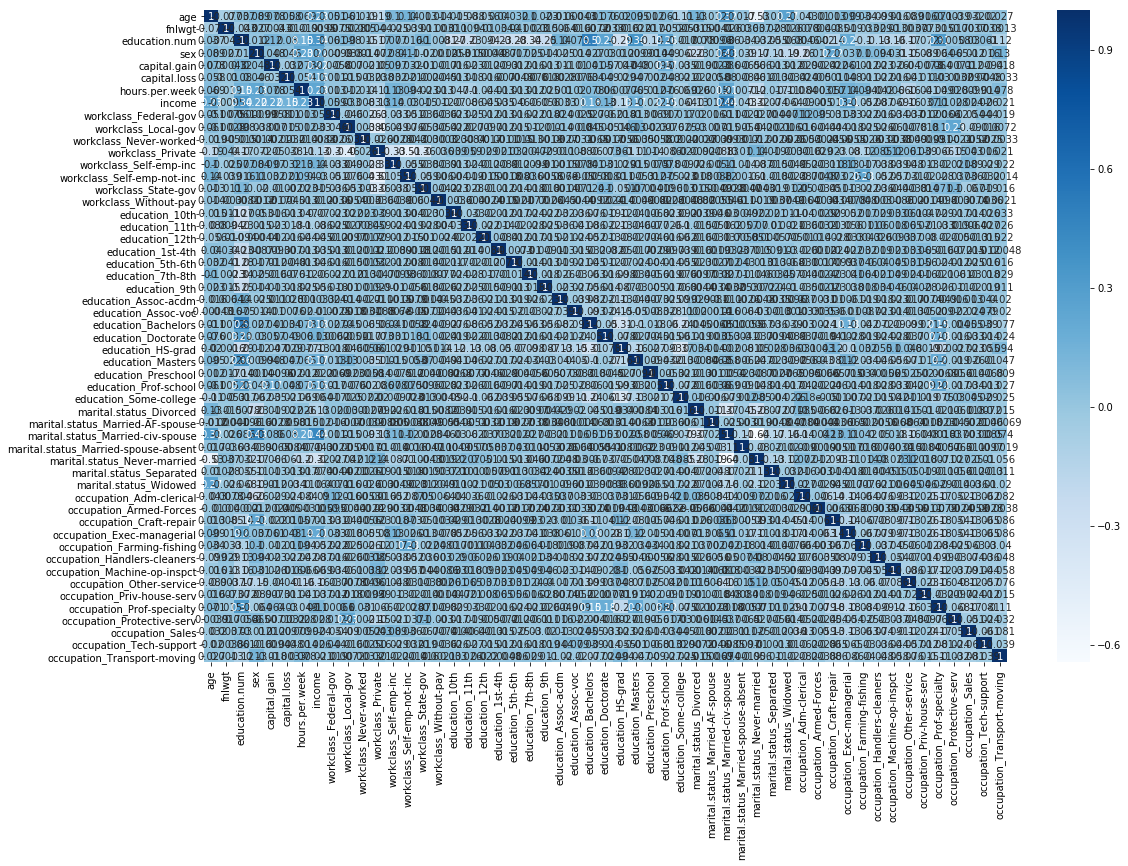

In [149]:
corr = dums.corr()
plt.figure(figsize=(18,12))
sns.heatmap(corr,cmap='Blues',annot=True)

As with dummies we got extra columns 

# So "Feature Engineering" is done to extract those columns which are important to get the model.

In [150]:
X = dums.drop(['income'],axis=1)    
Y = dums['income']

In [151]:
X = (X-X.min())/(X.max()-X.min())
X.head()

,age,fnlwgt,education.num,sex,capital.gain,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
0,0.301370,0.044302,0.800000,1.0,0.02174,0.0,0.397959,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.452055,0.048238,0.800000,1.0,0.00000,0.0,0.122449,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.287671,0.138113,0.533333,1.0,0.00000,0.0,0.397959,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.493151,0.151068,0.400000,1.0,0.00000,0.0,0.397959,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.150685,0.221488,0.800000,0.0,0.00000,0.0,0.397959,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [152]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(0.005)
X = selector.fit_transform(X)
X.shape,Y.shape

((32561, 46), (32561,))

 Applying various Classifiers and Comparing it.

# PCA

In [153]:
from sklearn.preprocessing import StandardScaler

In [154]:
x_Std=StandardScaler().fit_transform(X)

In [155]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)

In [156]:
principalComponents = pca.fit_transform(x_Std)

In [157]:
principalDf = pd.DataFrame(data = principalComponents)

In [158]:
principalDf

,0,1,2,3,4,5,6,7,8,9
0,0.965502,-2.620766,0.899101,1.673267,-0.466004,-0.570599,-0.296848,-0.090727,-0.779211,0.548021
1,2.969139,-0.016721,0.372375,0.673715,-0.302304,2.256338,0.468393,-0.973762,-1.512444,1.085403
2,-1.317700,0.948881,0.079632,-0.708449,-0.327593,-1.460707,1.358511,0.351995,-0.419131,-0.759289
3,-0.943858,1.976788,-1.343300,0.193301,1.622331,-0.518297,-0.592996,-0.707715,0.117639,1.105440
4,1.045051,-1.700920,-1.180999,-1.074840,1.216289,-0.242319,0.096489,-0.088600,-0.917641,-0.123905
5,1.811601,-1.269208,-0.464977,-1.276658,-0.010282,0.397298,-0.720398,-0.870470,0.575116,-0.004856
6,-3.013977,1.004874,2.054976,-2.099794,2.813389,1.935623,-1.500058,-1.894846,-1.150204,-1.397435
7,2.193324,2.127824,0.974749,0.874647,-0.897961,1.203797,1.399476,-0.004948,-0.274198,0.381069
8,0.830240,-3.069368,-0.681667,-0.616430,1.841073,0.017232,0.510200,0.294484,0.698122,-0.391935
9,2.043846,-0.375963,-1.638938,-1.109871,-0.640474,0.755263,-0.133266,-1.366316,-0.365060,0.566393


In [159]:
from sklearn.model_selection import train_test_split
principalDf_train,principalDf_test,Y_train,Y_test = train_test_split(principalDf,Y,test_size = 0.2)

In [160]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(principalDf_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [161]:
pred=model.predict(principalDf_test)
from sklearn import metrics
pca_acc=metrics.accuracy_score(Y_test,pred)*100
pca_acc

83.47919545524336

# Logistic Regression

In [162]:
from sklearn.linear_model import LogisticRegression
reg_lr = LogisticRegression(random_state=5)
reg_lr.fit(principalDf_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=5, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [163]:
pred_lr=reg_lr.predict(principalDf_test)
from sklearn import metrics
lr_acc=metrics.accuracy_score(Y_test,pred_lr)*100
lr_acc

83.47919545524336

# KNN

In [164]:
from sklearn.neighbors import KNeighborsClassifier
model_KNN = KNeighborsClassifier(n_neighbors=15)
model_KNN.fit(principalDf_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform')

In [165]:
pred_KNN = model_KNN.predict(principalDf_test)
knn_acc = model_KNN.score(principalDf_test,Y_test)*100
knn_acc

83.6480884385076

# Naive Bayes

# GaussianNB

In [166]:
from sklearn.naive_bayes import GaussianNB
model_gnb=GaussianNB()
model_gnb.fit(principalDf_train,Y_train)

GaussianNB(priors=None)

In [167]:
pred_gnb = model_gnb.predict(principalDf_test)
gnb_acc = metrics.accuracy_score(Y_test,pred_gnb)*100
gnb_acc


82.00522032857363

# BernoulliNB

In [169]:
from sklearn.naive_bayes import BernoulliNB
model_bnb=BernoulliNB()
model_bnb.fit(principalDf_train,Y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [170]:
pred_bnb = model_bnb.predict(principalDf_test)
bnb_acc = metrics.accuracy_score(Y_test,pred_bnb)*100
bnb_acc

78.6887762935667

# SVM

In [172]:
from sklearn.svm import SVC
model_svc=SVC()
model_svc.fit(principalDf_train,Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [173]:
pred_svc = model_svc.predict(principalDf_test)
svc_acc = metrics.accuracy_score(Y_test,pred_svc)*100
svc_acc

83.92445877475816

# Decision Tree

In [174]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
model_tree= DecisionTreeClassifier() #max_leaf_nodes=12 #random_state=1
model_tree.fit(principalDf_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [175]:
pred_tree = model_tree.predict(principalDf_test)
tree_acc=metrics.accuracy_score(Y_test,pred_tree)*100
tree_acc

79.22616305849839

# Entropy

In [176]:
model_tree1 = DecisionTreeClassifier(criterion="entropy") #max_leaf_nodes=12 #random_state=1
model_tree1.fit(principalDf_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [178]:
pred_tree1 = model_tree1.predict(principalDf_test)
tree1_acc= metrics.accuracy_score(Y_test,pred_tree1)*100
tree1_acc

78.9497927222478

# RandomForest

In [179]:
b = RandomForestClassifier(max_leaf_nodes=14)
b.fit(principalDf_train,Y_train)
b_pred = b.predict(principalDf_test)
bacc=metrics.accuracy_score(Y_test,b_pred)*100
bacc

83.06463995086749

# Entropy

In [180]:
b1 = RandomForestClassifier(criterion="entropy",max_leaf_nodes=14)
b1.fit(principalDf_train,Y_train)
b1_pred = b1.predict(principalDf_test)
b1acc=metrics.accuracy_score(Y_test,b1_pred)*100
b1acc

82.55796100107477

# Ensemble methods:-

# BaggingClassifier

In [182]:
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(max_samples=0.5,max_features=0.5)
bagging.fit(principalDf_train,Y_train)
pred_E_BC = bagging.predict(principalDf_test)
bc=metrics.accuracy_score(Y_test,pred_E_BC)*100
bc

82.65008444649163

# GradientBoostingClassifier

In [183]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
model_E_GBC = GradientBoostingClassifier(n_estimators=200,learning_rate=.02)
model_E_GBC.fit(principalDf_train,Y_train)
pred_E_GBC = model_E_GBC.predict(principalDf_test)
gbcacc = metrics.accuracy_score(Y_test,pred_E_GBC)*100
gbcacc

83.8323353293413

# VotingClassifier

In [184]:
from sklearn.ensemble import VotingClassifier
model1 = DecisionTreeClassifier()
model2 = LogisticRegression()
model3 = SVC()
model_E_VC = VotingClassifier(estimators=[('DT',model1),('LR',model2),('SVC',model3)])
model_E_VC.fit(principalDf_train,Y_train)
pred_E_VC = model_E_VC.predict(principalDf_test)
vc=metrics.accuracy_score(Y_test,pred_E_VC)*100
vc

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


84.15476738830033

In [185]:
accuracyScore = [pca_acc,lr_acc,knn_acc,gnb_acc,bnb_acc,svc_acc,tree_acc,tree1_acc,bacc,b1acc,bc,gbcacc,vc]
algoName = ['PCA', 'LR', 'KNN' , 'GNB', 'BNB' , 'SVM' , 'DT' , 'EDT', 'RF' , 'ERF','BC','GBC','VC']

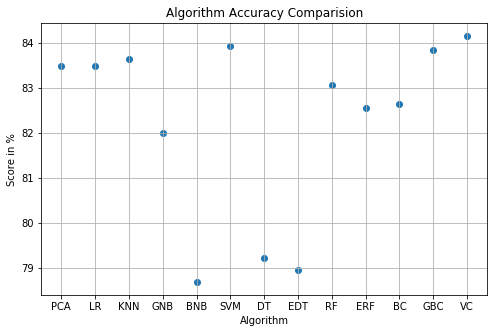

In [186]:
plt.scatter(algoName, accuracyScore)
plt.grid()
plt.title('Algorithm Accuracy Comparision')
plt.xlabel('Algorithm')
plt.ylabel('Score in %')
plt.show()

# Conclusion: We get a maximum of 84 % accuracy via VC Model